In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import plotly.graph_objects as go

In [3]:
data = pd.read_csv(r"C:\Users\DANIEL\Downloads\US_Accidents_March23.csv\US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
print("Number of columns: ",len(data.columns))
print("number of rows: ",len(data))

Number of columns:  46
number of rows:  7728394


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [8]:
len(data.select_dtypes(['int64', 'float64']).columns)

13

In [9]:
data.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [11]:
# int, float and boolean data
print(data.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(data.count(numeric_only=True)))

Severity             7728394
Start_Lat            7728394
Start_Lng            7728394
End_Lat              4325632
End_Lng              4325632
Distance(mi)         7728394
Temperature(F)       7564541
Wind_Chill(F)        5729375
Humidity(%)          7554250
Pressure(in)         7587715
Visibility(mi)       7551296
Wind_Speed(mph)      7157161
Precipitation(in)    5524808
Amenity              7728394
Bump                 7728394
Crossing             7728394
Give_Way             7728394
Junction             7728394
No_Exit              7728394
Railway              7728394
Roundabout           7728394
Station              7728394
Stop                 7728394
Traffic_Calming      7728394
Traffic_Signal       7728394
Turning_Loop         7728394
dtype: int64
Total No. of Numerical Columns: 26


In [12]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_percentage = missing_values[missing_values!=0]/len(data)*100
print(" Percentage of Missing Values \n", missing_percentage)

 Percentage of Missing Values 
 End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64


In [13]:

df = {
    'Start_Time': ['2024-01-01 00:00:00', None, '2024-01-01 02:00:00'],
    'City': ['CityA', 'CityB', None],
    'Latitude': [34.0522, 36.7783, None],
    'Longitude': [-118.2437, None, -74.0060]
}

df1 = pd.DataFrame(df)
missing_data = df1.isna().sum()

print(missing_data)

Start_Time    1
City          1
Latitude      1
Longitude     1
dtype: int64


In [14]:
df1.isna().sum().sort_values(ascending=False)*100./len(df1)

Start_Time    33.333333
City          33.333333
Latitude      33.333333
Longitude     33.333333
dtype: float64

In [15]:
missing_values = df1.isna().sum().sort_values(ascending=False)
missing_percentage = (missing_values * 100) / len(df1)
print(missing_percentage)


Start_Time    33.333333
City          33.333333
Latitude      33.333333
Longitude     33.333333
dtype: float64


In [16]:
type(missing_data)

pandas.core.series.Series

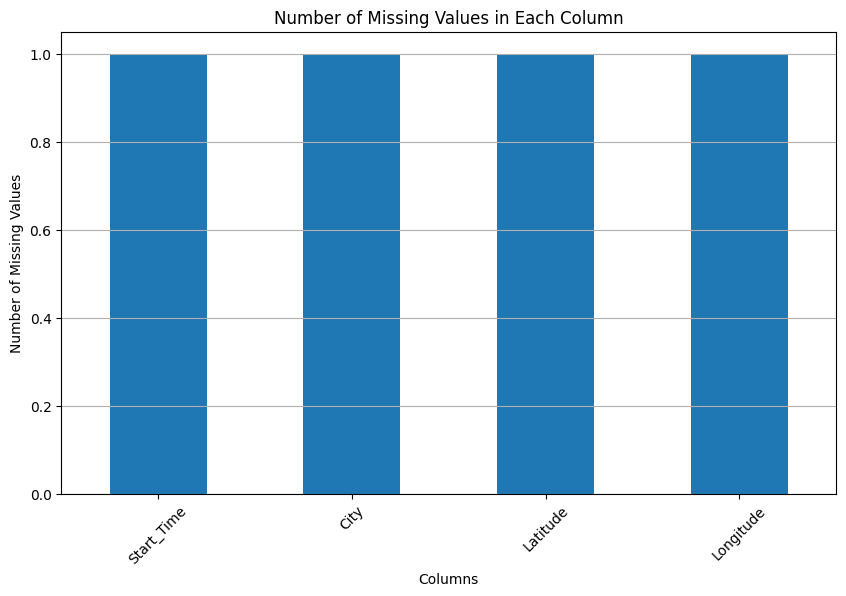

In [17]:
df = {
    'Start_Time': ['2024-01-01 00:00:00', None, '2024-01-01 02:00:00'],
    'City': ['CityA', 'CityB', None],
    'Latitude': [34.0522, 36.7783, None],
    'Longitude': [-118.2437, None, -74.0060]
}
df1 = pd.DataFrame(df)

missing_data = df1.isna().sum()
missing_data.plot(kind='bar', figsize=(10, 6))  
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

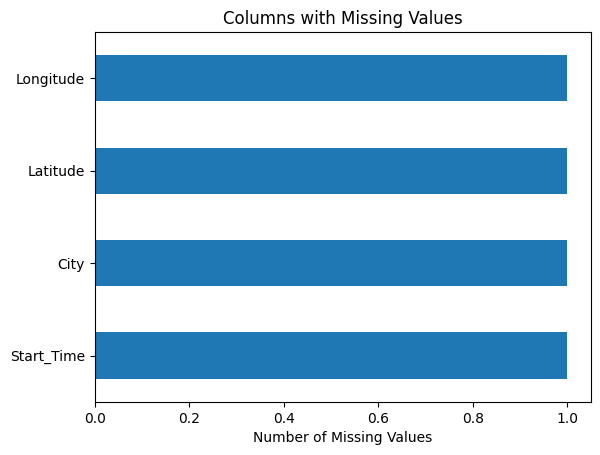

In [49]:

df = {
    'Start_Time': ['2024-01-01 00:00:00', None, '2024-01-01 02:00:00'],
    'City': ['CityA', 'CityB', None],
    'Latitude': [34.0522, 36.7783, None],
    'Longitude': [-118.2437, None, -74.0060]
}
df1 = pd.DataFrame(df)

missing_data = df1.isna().sum()

if not missing_data.empty:
    missing_data[missing_data != 0].plot(kind='barh')
    plt.xlabel('Number of Missing Values')
    plt.title('Columns with Missing Values')
    plt.show()
else:
    print("No missing values found.")

In [50]:
df1.columns

Index(['Start_Time', 'City', 'Latitude', 'Longitude'], dtype='object')

In [51]:
df1.City.unique()

array(['CityA', 'CityB', None], dtype=object)

In [52]:
cities=df1.City.unique()
len(cities)

3

In [53]:
cities_by_accident = df1.City.value_counts()
cities_by_accident[:20]

City
CityA    1
CityB    1
Name: count, dtype: int64

In [54]:
'Dallas' in cities  

False

In [55]:
print(cities_by_accident.index)

Index(['CityA', 'CityB'], dtype='object', name='City')


<Axes: ylabel='City'>

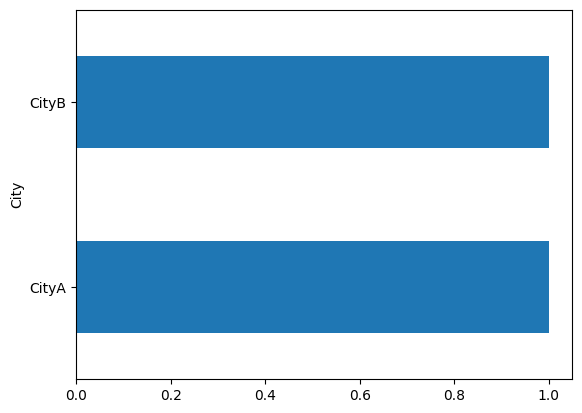

In [56]:
cities_by_accident[:20].plot(kind='barh')

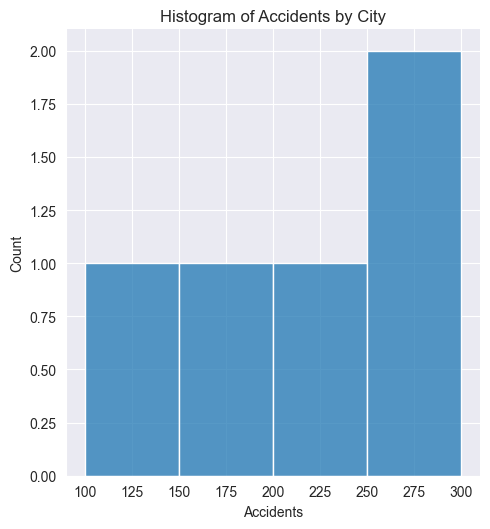

In [57]:
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd
cities_by_accident = pd.Series([100, 200, 150, 300, 250], index=['CityA', 'CityB', 'CityC', 'CityD', 'CityE'])
sns.displot(cities_by_accident, kde=False) 
plt.xlabel('Accidents')
plt.ylabel('Count')
plt.title('Histogram of Accidents by City')
plt.show()

In [58]:
accident_counts = df1.groupby('City').size()
high_accident_cities = accident_counts[accident_counts > 1000]
print(high_accident_cities)

Series([], dtype: int64)


In [59]:
low_accident_cities = accident_counts[accident_counts < 1001]
print(low_accident_cities)

City
CityA    1
CityB    1
dtype: int64


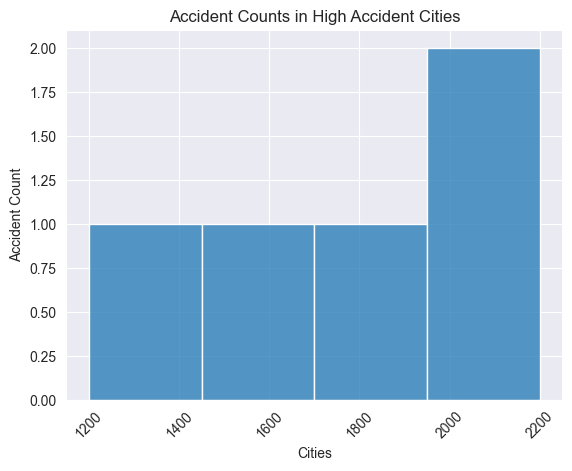

In [60]:
high_accident_cities = pd.Series([1200, 1500, 1800, 2000, 2200], index=['CityA', 'CityB', 'CityC', 'CityD', 'CityE'])
if not high_accident_cities.empty and high_accident_cities.notna().all():
    # Plotting with histplot
    sns.histplot(high_accident_cities, kde=False)
    plt.xlabel('Cities')
    plt.ylabel('Accident Count')
    plt.title('Accident Counts in High Accident Cities')
    plt.xticks(rotation=45) 
    plt.show()
else:
    print("The dataset is empty or contains invalid values.")

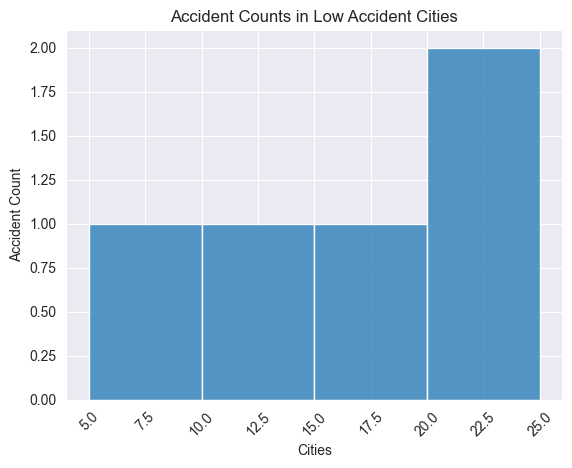

In [61]:
low_accident_cities = pd.Series([10, 20, 15, 5, 25], index=['CityX', 'CityY', 'CityZ', 'CityW', 'CityV'])

if not low_accident_cities.empty and low_accident_cities.notna().all():
    sns.histplot(low_accident_cities, kde=False)
    plt.xlabel('Cities')
    plt.ylabel('Accident Count')
    plt.title('Accident Counts in Low Accident Cities')
    plt.xticks(rotation=45)  
    plt.show()
else:
    print("The dataset is empty or contains invalid values.")

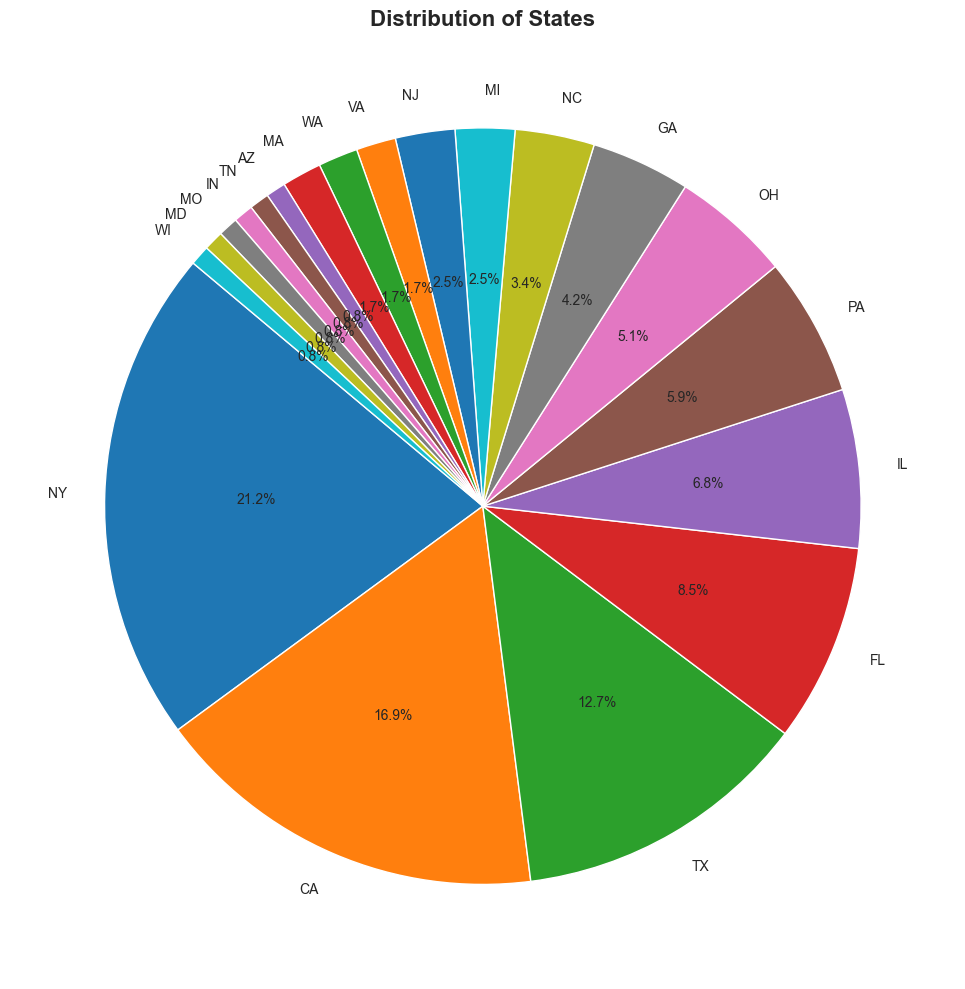

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
df = {
    'State': ['NY', 'CA', 'TX', 'FL', 'IL', 'PA', 'OH', 'GA', 'NC', 'MI', 
              'NJ', 'VA', 'WA', 'MA', 'AZ', 'TN', 'IN', 'MO', 'MD', 'WI'],
    'Count': [25, 20, 15, 10, 8, 7, 6, 5, 4, 3, 
              3, 2, 2, 2, 1, 1, 1, 1, 1, 1]
}
df1 = pd.DataFrame(df)
plt.figure(figsize=(10, 10))  

plt.pie(df1['Count'], labels=df1['State'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of States', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
null_cols = [i for i in data.columns if data[i].isnull().any()]
print(null_cols)

['End_Lat', 'End_Lng', 'Description', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


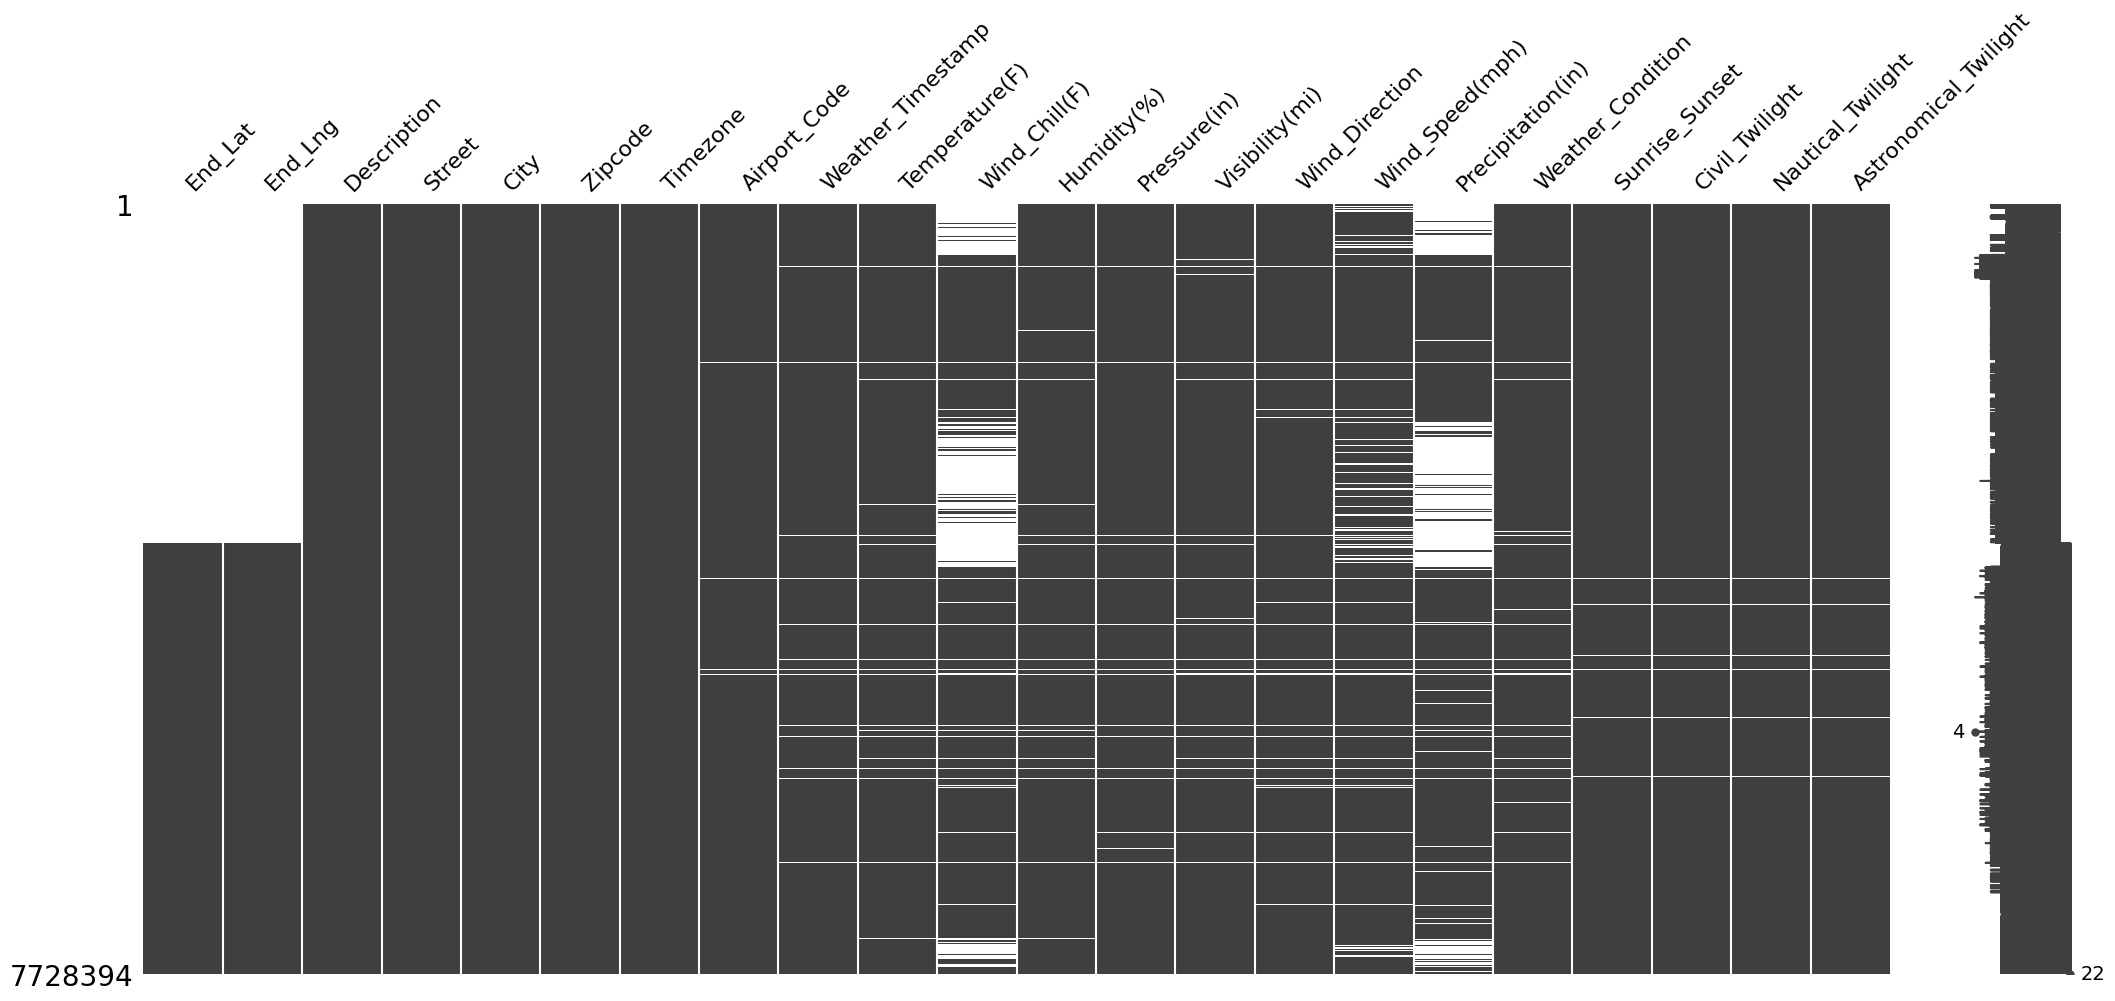

In [19]:
mn.matrix(data[null_cols]);

In [20]:
new_data_a = data.drop(columns=["End_Lng", "End_Lat"], axis=0)

In [21]:
new_data_b = new_data_a.dropna(subset = ['Visibility(mi)','Weather_Condition','Humidity(%)','Temperature(F)','Wind_Direction','Pressure(in)','Weather_Timestamp','Airport_Code','Timezone','Zipcode','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','City','Description'])

In [22]:
new_data_b.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                     10214
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1769892
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           375174
Precipitation(in)        2039619
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way  

In [23]:
final_data = new_data_b.drop(columns = 'ID', axis=0)

In [24]:
final_data.isnull().sum()

Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Street                     10214
City                           0
County                         0
State                          0
Zipcode                        0
Country                        0
Timezone                       0
Airport_Code                   0
Weather_Timestamp              0
Temperature(F)                 0
Wind_Chill(F)            1769892
Humidity(%)                    0
Pressure(in)                   0
Visibility(mi)                 0
Wind_Direction                 0
Wind_Speed(mph)           375174
Precipitation(in)        2039619
Weather_Condition              0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction  

In [25]:
import plotly
state_counts = final_data["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [26]:
print("State Code: ", final_data.State.unique())
print("Total No. of State in Dataset: ", len(final_data.State.unique()))

State Code:  ['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']
Total No. of State in Dataset:  49


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3875190644.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




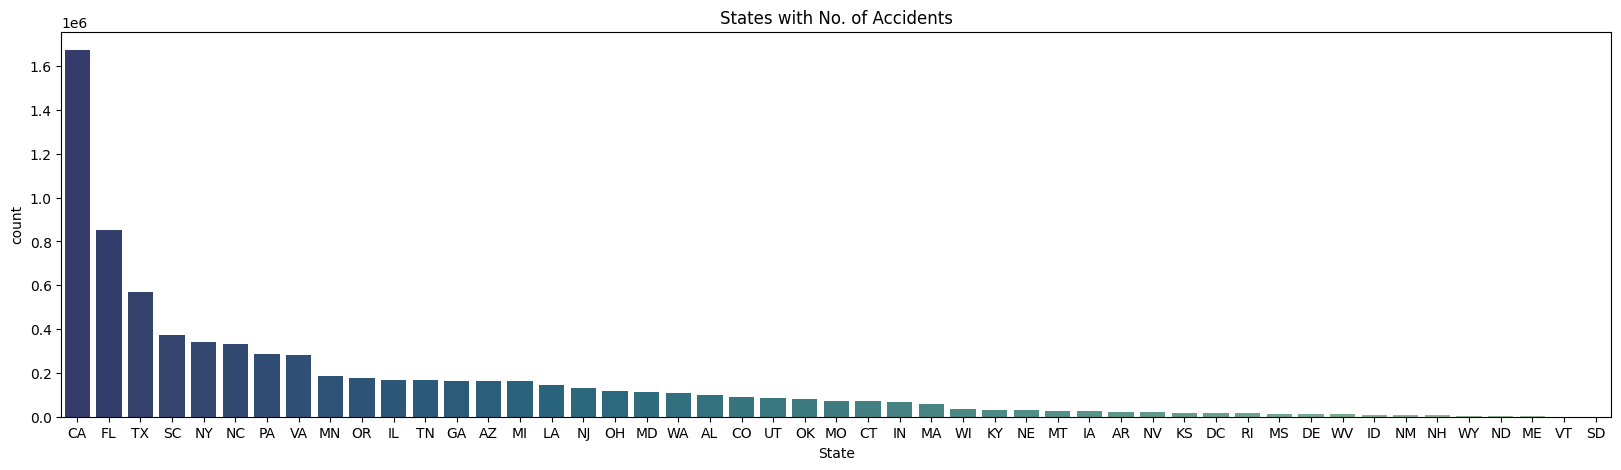

In [27]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=final_data, orient = 'v', palette = "crest_r", order = final_data['State'].value_counts().index)
c.set_title("States with No. of Accidents");

In [28]:
print("City Code: ", final_data.City.unique())
print("Total No. of Cities in Dataset: ", len(final_data.City.unique()))

City Code:  ['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Ness City' 'Clarksdale'
 'American Fork-Pleasant Grove']
Total No. of Cities in Dataset:  12237


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3301041443.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3301041443.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



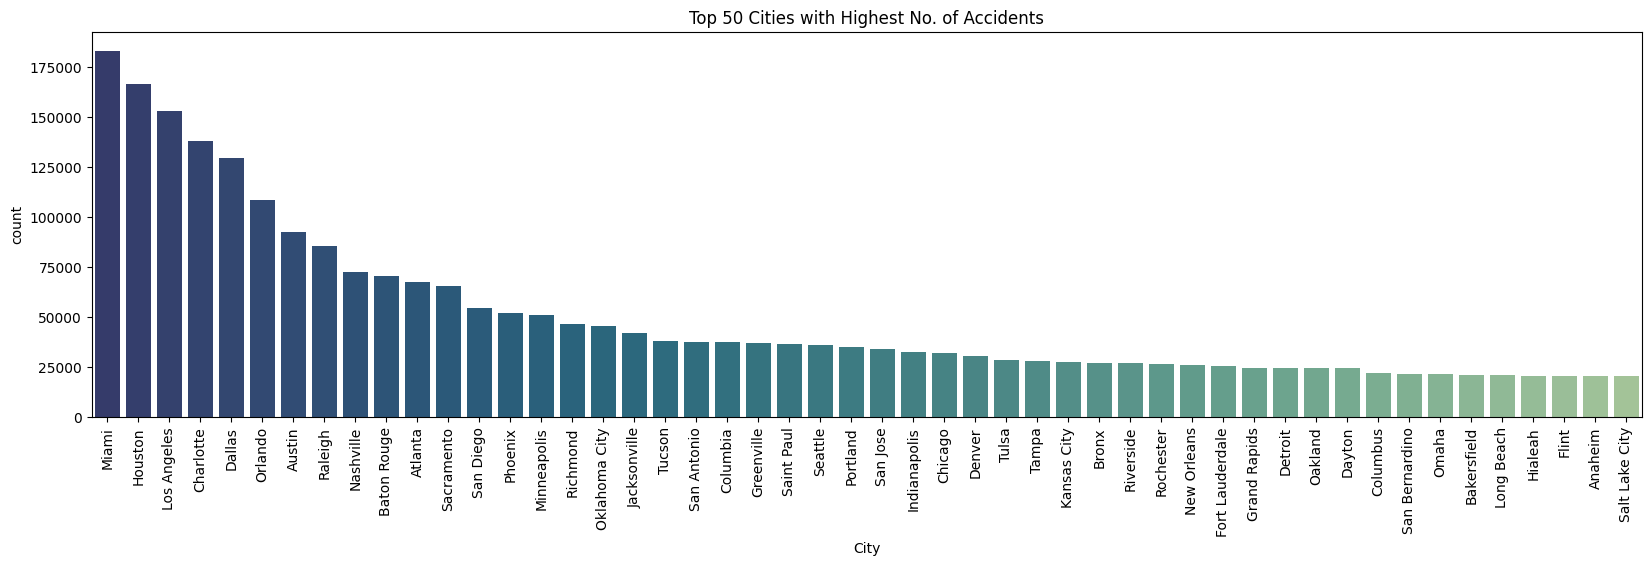

In [29]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=final_data, order=final_data.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest No. of Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [32]:
# Convert Start_Time to datetime
final_data['Start_Time'] = pd.to_datetime(final_data['Start_Time'], errors='coerce')

# Display the first value to check the conversion
print(final_data['Start_Time'][0])

2016-02-08 05:46:00


In [33]:
final_data['Month'] = final_data['Start_Time'].dt.month
final_data['Year'] = final_data['Start_Time'].dt.year
final_data['Hour'] = final_data['Start_Time'].dt.hour
final_data['Weekday'] = final_data['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = final_data[final_data.Start_Time.dt.year == 2016]
data_2017 = final_data[final_data.Start_Time.dt.year == 2017]
data_2018 = final_data[final_data.Start_Time.dt.year == 2018]
data_2019 = final_data[final_data.Start_Time.dt.year == 2019]
data_2020 = final_data[final_data.Start_Time.dt.year == 2020]
data_2017_2019 = final_data[(final_data["Year"] >= 2017) & (final_data["Year"] <= 2019)]

YEARLY

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\200117474.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




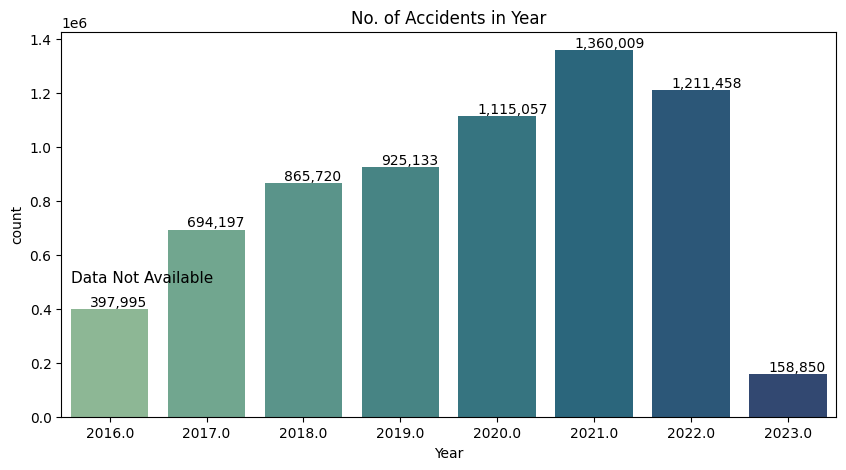

In [34]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=final_data, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

MONTHLY

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\87877742.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




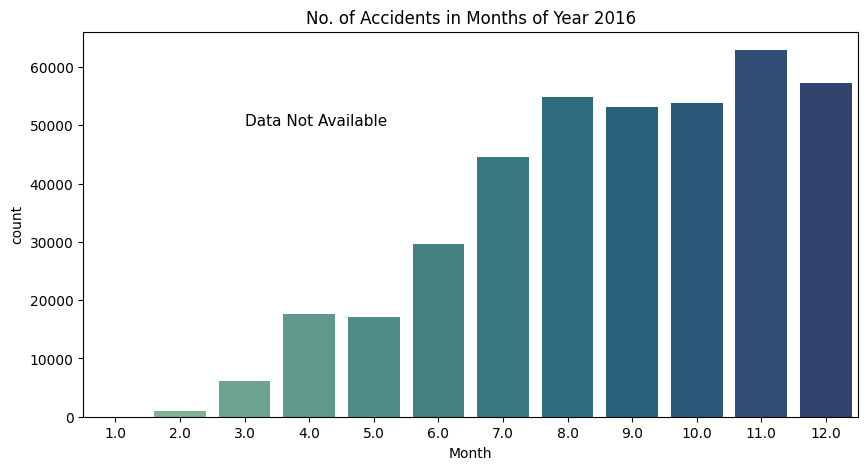

In [35]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\2391813336.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




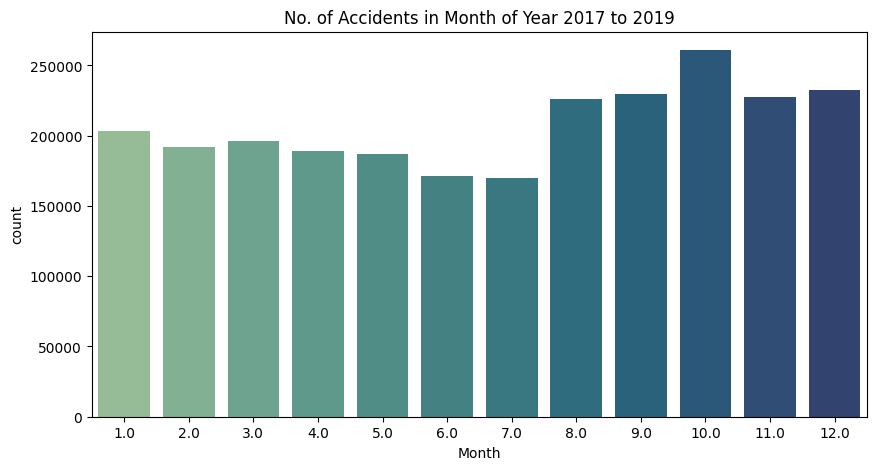

In [36]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\1571224331.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




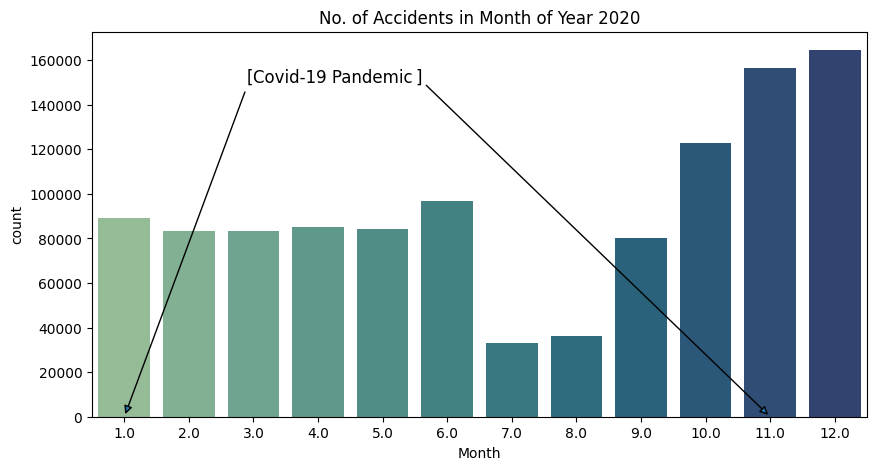

In [37]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(2,150000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(4.5,150000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

WEEKLY

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3890046308.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




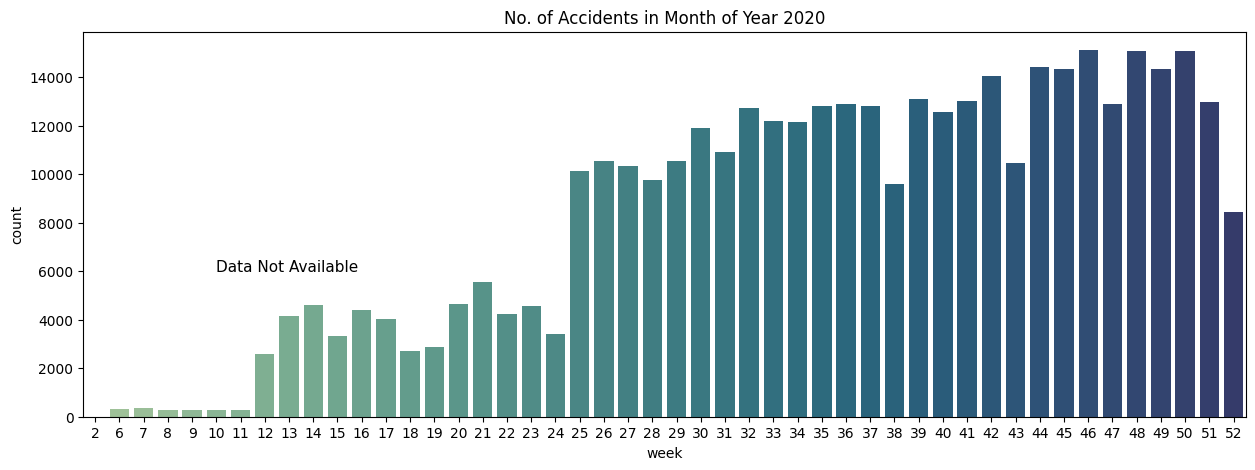

In [38]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(5,6000), fontsize=11)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3944489485.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




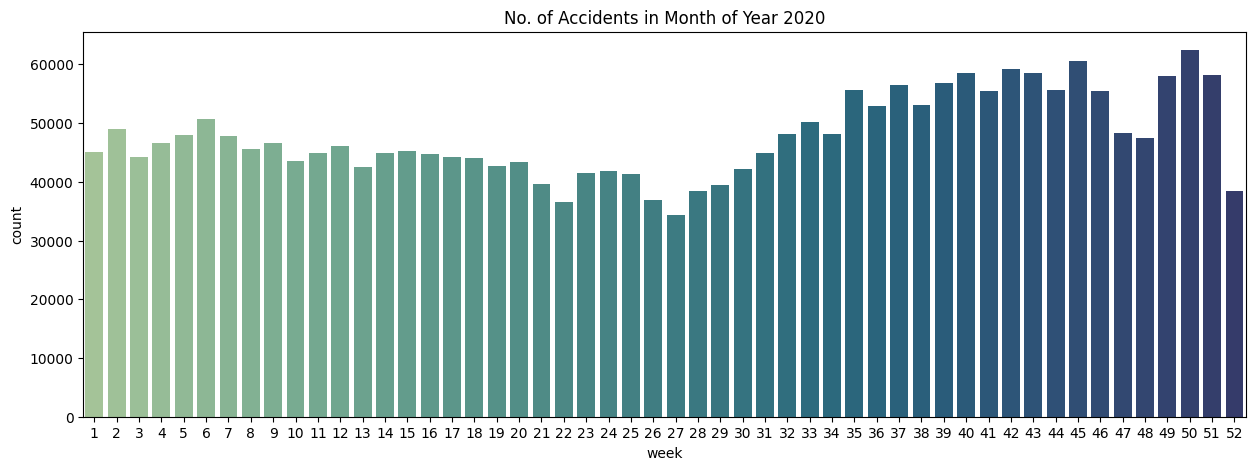

In [39]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2017_2019.Start_Time.dt.isocalendar().week, data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\4169446534.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




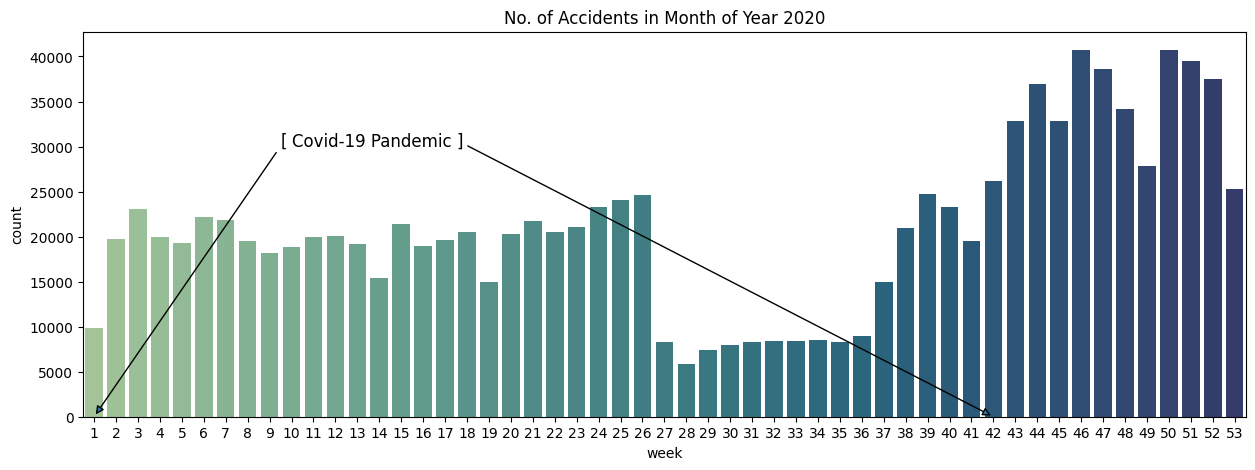

In [40]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2020.Start_Time.dt.isocalendar().week, data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(9,30000), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(8.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(41,0),xytext=(16.5,30000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\1844361266.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




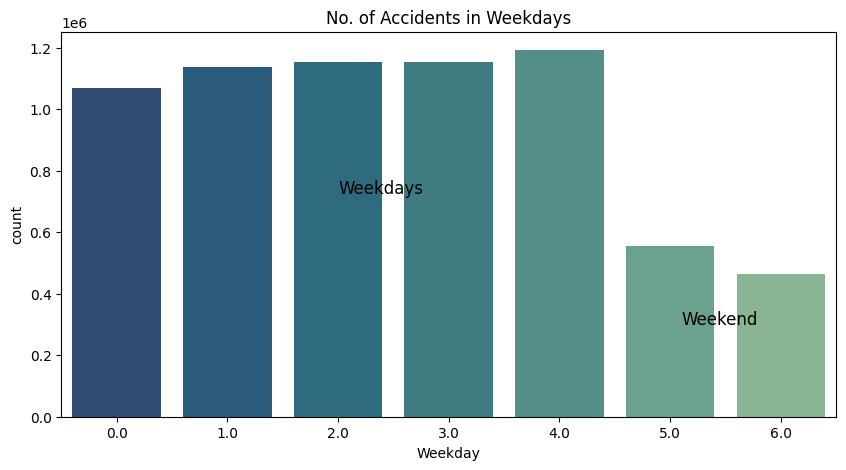

In [41]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=final_data, orient = 'v', palette = "crest_r")
plt.annotate('Weekdays',xy=(2,728000), fontsize=12)
plt.annotate('Weekend',xy=(5.1,300000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\3307946194.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




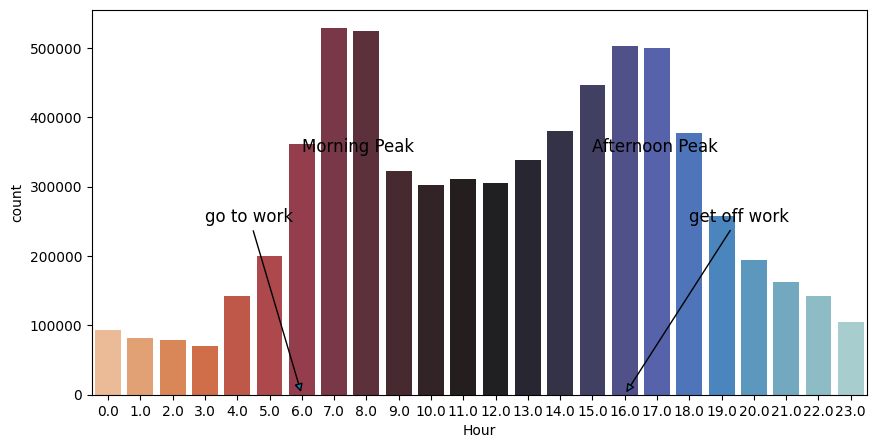

In [42]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=final_data, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,350000), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,350000), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,250000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\2473846524.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




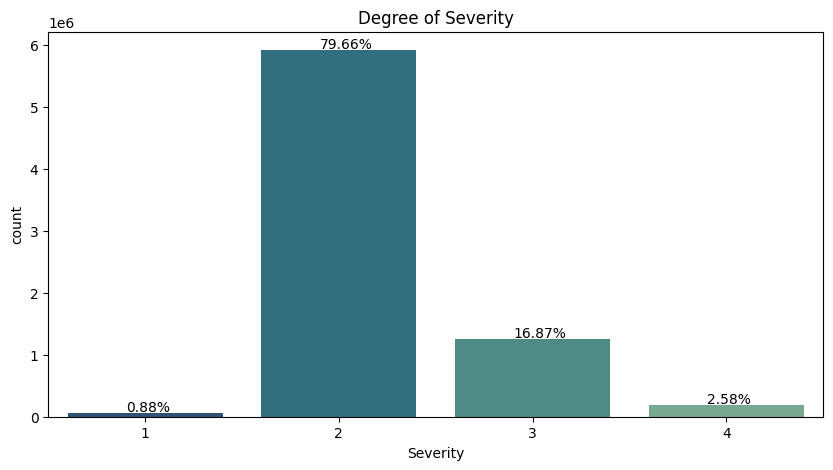

In [43]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Severity", data=final_data, orient = 'v', palette = "crest_r")
c.set_title("Degree of Severity")
for i in ax.patches:
    count = "{:.2%}".format(i.get_height()/len(final_data.Severity))
    x = i.get_x()+i.get_width()-0.50
    y = i.get_height()+20000
    ax.annotate(count, (x, y))
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\2690903833.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




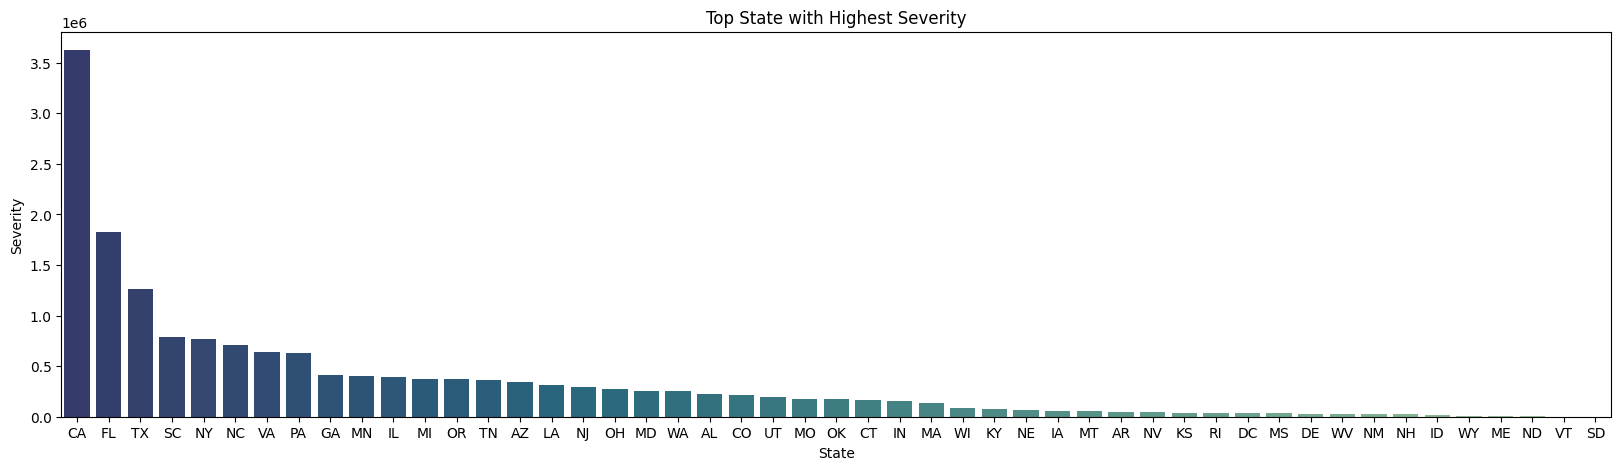

In [44]:
df_state = final_data.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\604768754.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_22944\604768754.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



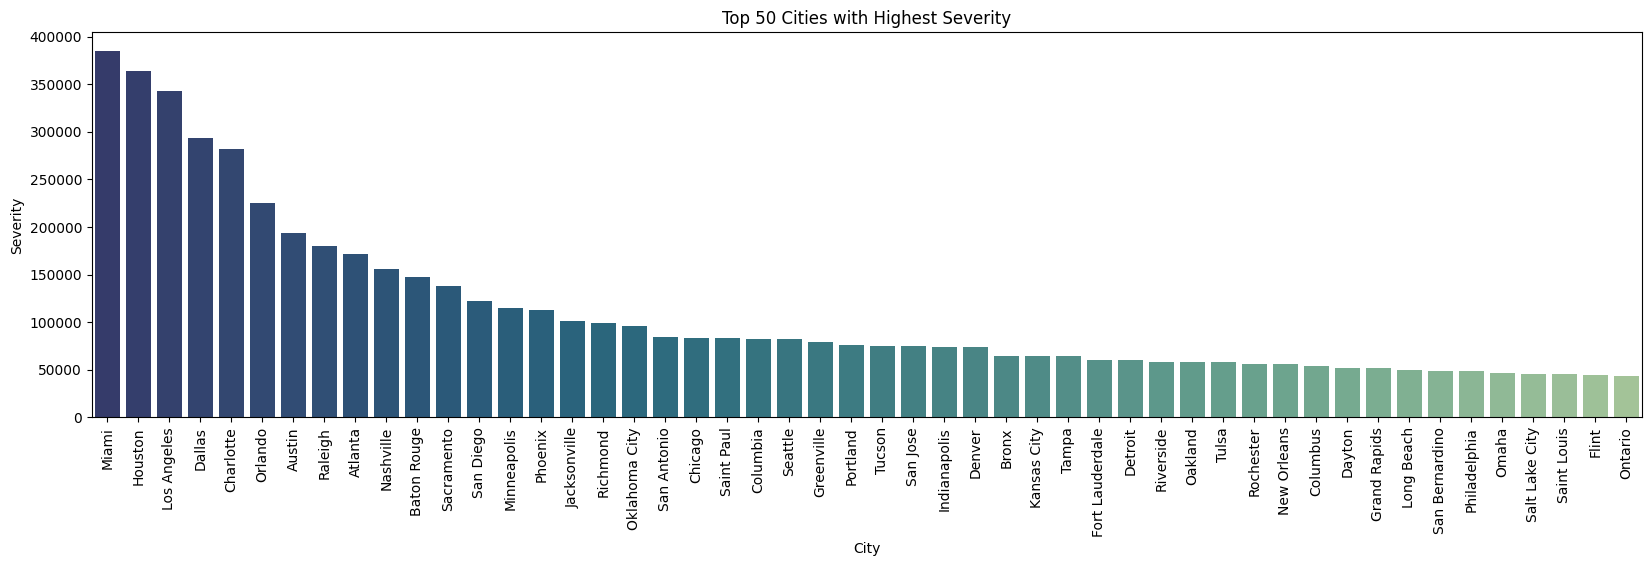

In [45]:
df_city = final_data.groupby('City').sum('Severity')[['Severity']]
df_city = df_city.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'City', y = 'Severity', data = df_city, orient = 'v', palette = "crest_r")
c.set_title("Top 50 Cities with Highest Severity")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [46]:
final_data.iloc[:10, 17:26]

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain
1,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain
2,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast
3,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy
4,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy
5,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain
6,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast
7,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast
8,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy
9,37.4,33.8,100.0,29.62,3.0,SSW,4.6,0.02,Light Rain


In [47]:
final_data.iloc[:10, 27:39]

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


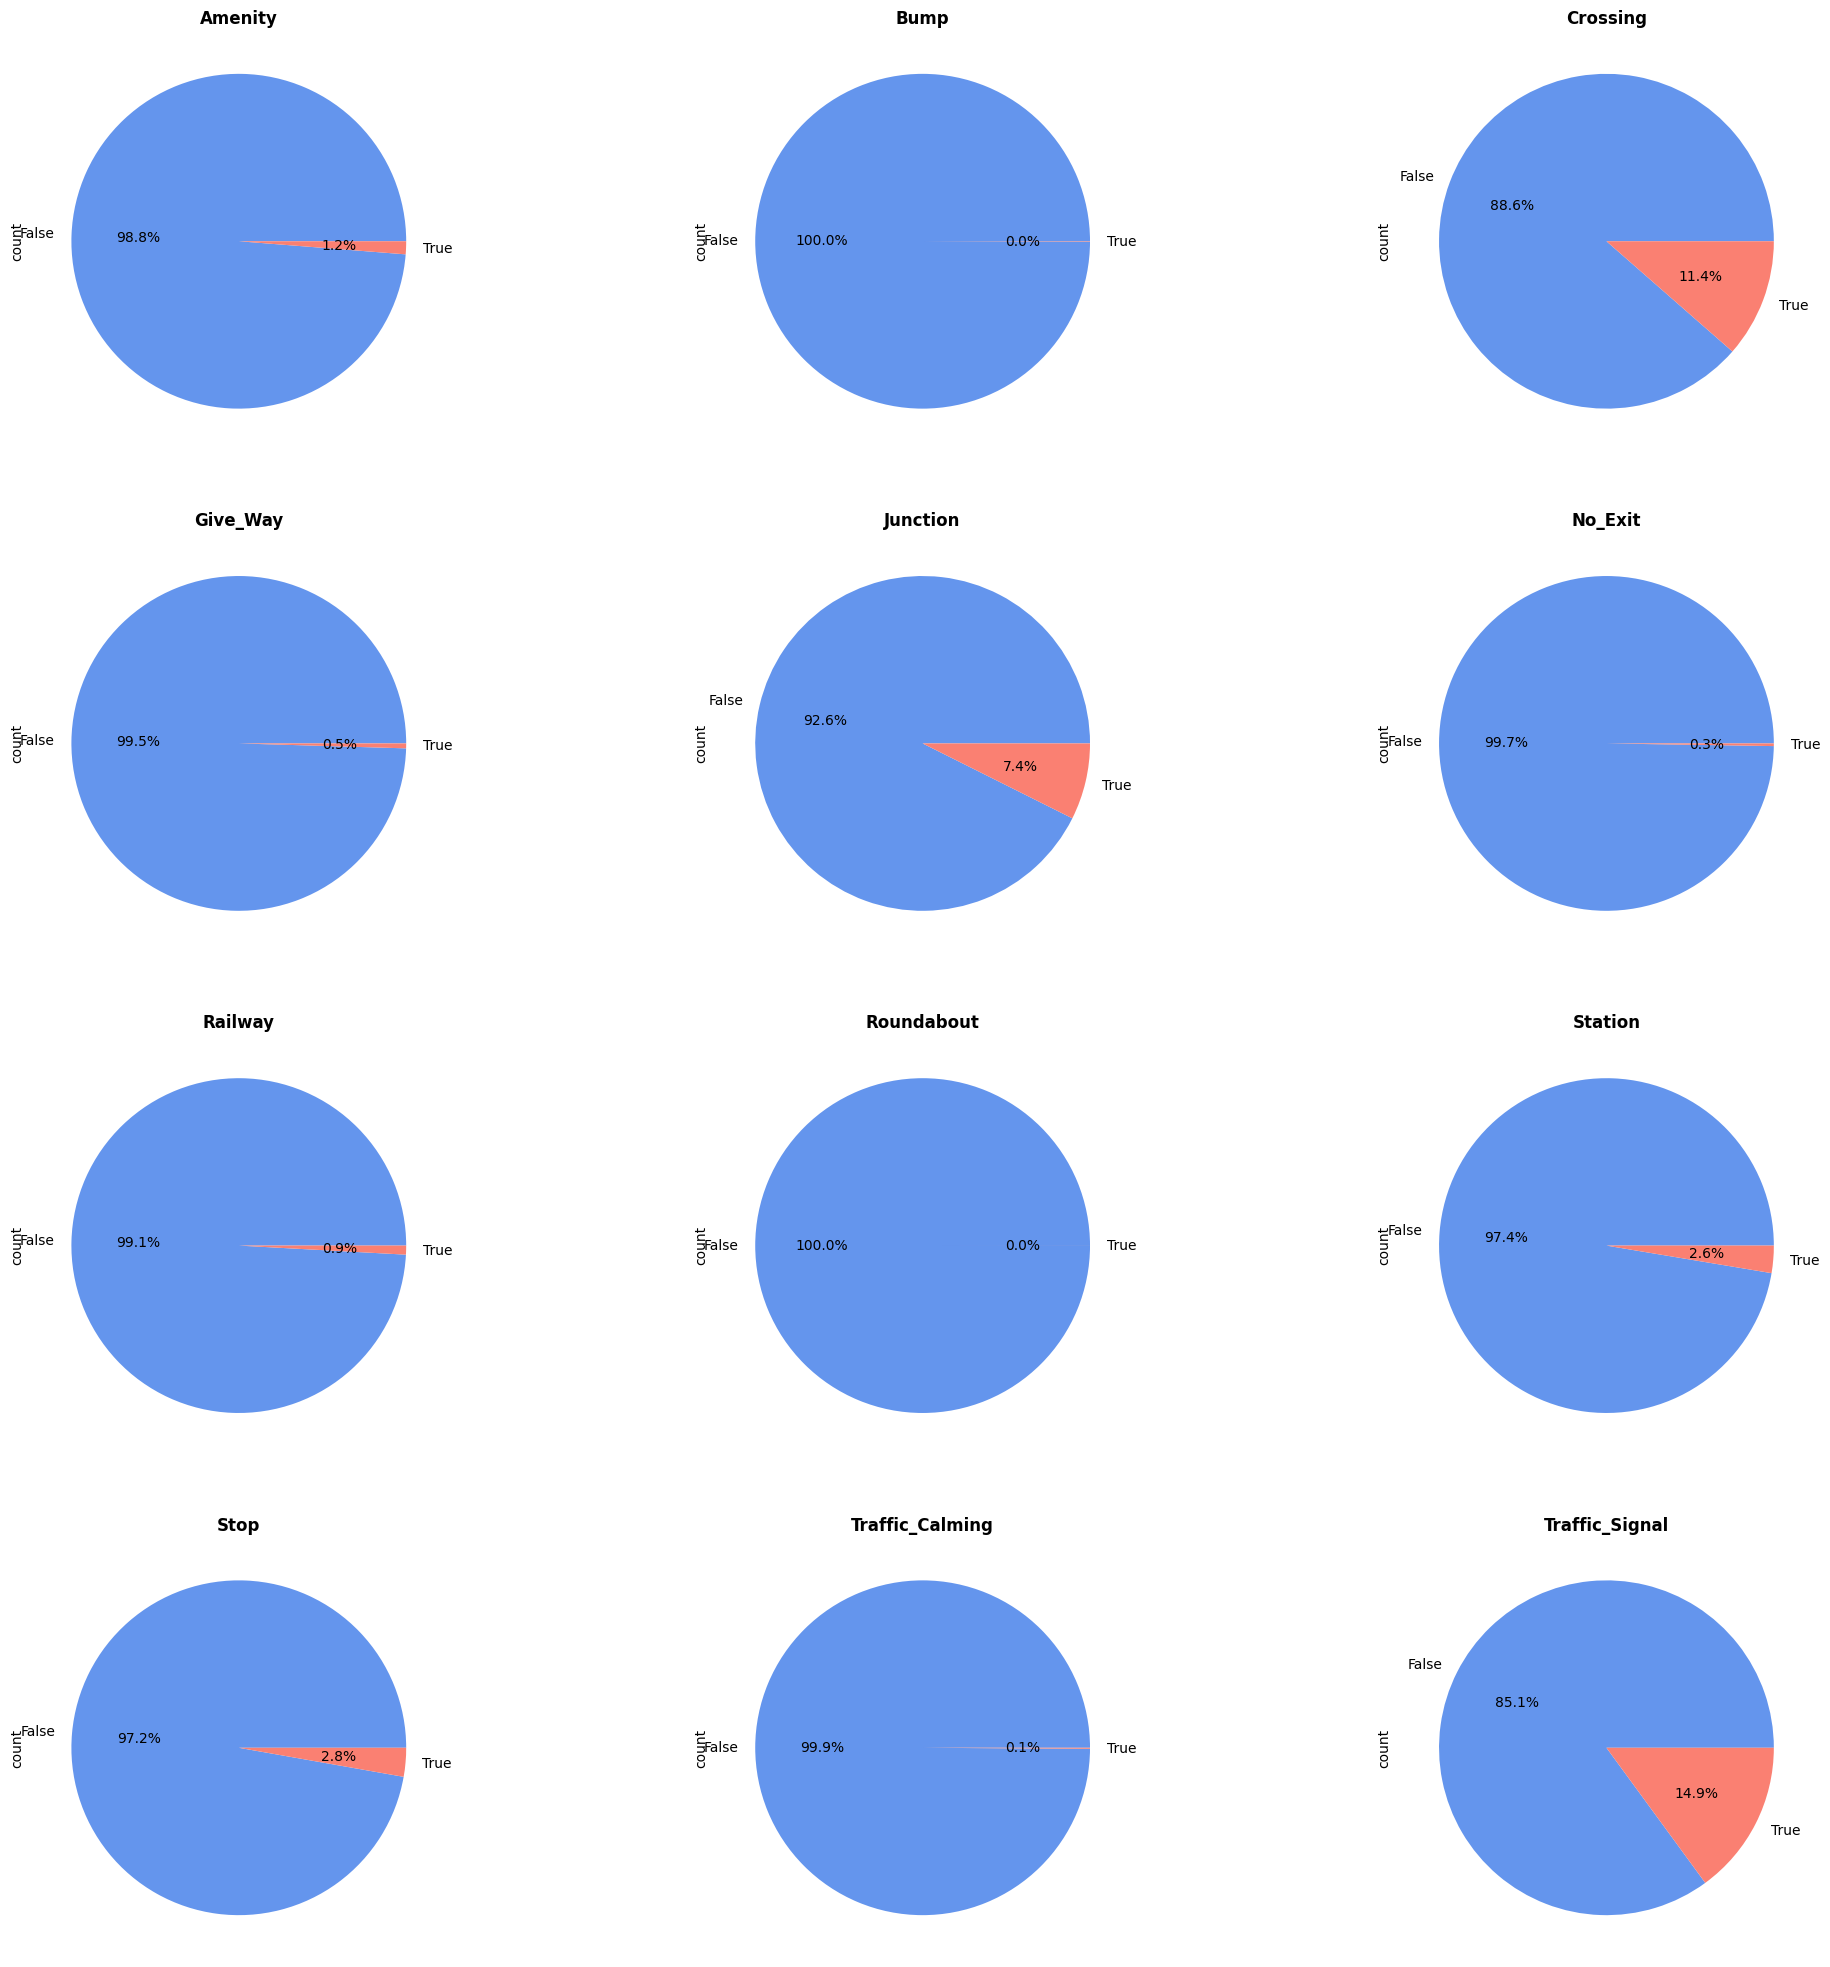

In [48]:
f,ax=plt.subplots(4,3,figsize=(25,25))
ax[0,0] = final_data['Amenity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,0],colors=["cornflowerblue","salmon"])
ax[0,0].set_title("Amenity",fontweight ="bold")
ax[0,1] = final_data['Bump'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,1],colors=["cornflowerblue","salmon"])
ax[0,1].set_title("Bump",fontweight ="bold")
ax[0,2] = final_data['Crossing'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0,2],colors=["cornflowerblue","salmon"])
ax[0,2].set_title("Crossing",fontweight ="bold")
ax[1,0] = final_data['Give_Way'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],colors=["cornflowerblue","salmon"])
ax[1,0].set_title("Give_Way",fontweight ="bold")
ax[1,1] = final_data['Junction'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1],colors=["cornflowerblue","salmon"])
ax[1,1].set_title("Junction",fontweight ="bold")
ax[1,2] = final_data['No_Exit'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2],colors=["cornflowerblue","salmon"])
ax[1,2].set_title("No_Exit",fontweight ="bold")
ax[2,0] = final_data['Railway'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],colors=["cornflowerblue","salmon"])
ax[2,0].set_title("Railway",fontweight ="bold")
ax[2,1] = final_data['Roundabout'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,1],colors=["cornflowerblue","salmon"])
ax[2,1].set_title("Roundabout",fontweight ="bold")
ax[2,2] = final_data['Station'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,2],colors=["cornflowerblue","salmon"])
ax[2,2].set_title("Station",fontweight ="bold")
ax[3,0] = final_data['Stop'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,0],colors=["cornflowerblue","salmon"])
ax[3,0].set_title("Stop",fontweight ="bold")
ax[3,1] = final_data['Traffic_Calming'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,1],colors=["cornflowerblue","salmon"])
ax[3,1].set_title("Traffic_Calming",fontweight ="bold")
ax[3,2] = final_data['Traffic_Signal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[3,2],colors=["cornflowerblue","salmon"])
ax[3,2].set_title("Traffic_Signal",fontweight ="bold")
plt.show()